In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/dataset_with_sentiments.csv')

In [3]:
df

,Name,Comment,Date,Model,sentiment
0,Mazda 3s,After months of releasing preview images and s...,"August 29, 2022",Maserati Grecale,3
1,Darepoole,It looks like the Macan with a little bit of I...,"March 22, 2022",Maserati Grecale,2
2,JackStraw79,Nice hot hatch!,"March 22, 2022",Maserati Grecale,4
3,CostcoPizza,"Looks like a car you'd find in GTA V DLC, whic...","March 22, 2022",Maserati Grecale,3
4,Venom21,Terrible gloss black: CheckTerrible touchscree...,"March 22, 2022",Maserati Grecale,0
...,...,...,...,...,...
49370,Wing Commander,I suppose we should be grateful that at least ...,"October 02, 2021",Porsche Macan,4
49371,sd1985,Our first macan was a base on 21s with no Pasm...,"October 02, 2021",Porsche Macan,2
49372,BanZ,"For gen3, on the uk configurator PASM is not c...","October 02, 2021",Porsche Macan,3
49373,Col Lamb,Well that is another reason for avoiding the 2...,"October 02, 2021",Porsche Macan,0


In [4]:
# Classify comments based on sentiment values
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'Positive' if x > 2 else ('Negative' if x < 2 else 'Neutral'))

# Group by Model and sentiment_label to get counts
sentiment_counts = df.groupby(['Model', 'sentiment_label']).size().unstack().reset_index()

sentiment_counts


sentiment_label,Model,Negative,Neutral,Positive
0,Alfa Romeo Stelvio,3147,2551,2759
1,Audi Q5,3984,2743,3271
2,BMW X3,4671,3086,4276
3,Maserati Grecale,373,216,298
4,Porsche Macan,6676,5122,6202


In [5]:
# Calculate the percentage for each sentiment label based on the total comments for each car model
sentiment_percentages = sentiment_counts.set_index('Model').div(sentiment_counts.set_index('Model').sum(axis=1), axis=0) * 100


In [6]:
sentiment_percentages

sentiment_label,Negative,Neutral,Positive
Model,,,
Alfa Romeo Stelvio,37.211777,30.164361,32.623862
Audi Q5,39.847970,27.435487,32.716543
BMW X3,38.818250,25.646140,35.535610
Maserati Grecale,42.051860,24.351747,33.596392
Porsche Macan,37.088889,28.455556,34.455556


In [8]:
df2 = pd.read_csv('/CombinedPistonheads.csv')

In [9]:
df2

,Name,Comment,Date,Model
0,Gumpclipper,"Good morning all,I am looking at buying my fir...","October 10, 2021",Porsche Macan
1,Voodoo Blue,I’m not going to offer an opinion on spec as t...,"October 10, 2021",Porsche Macan
2,Gumpclipper,Fantastic info. Thank you! Will take a look at...,"October 10, 2021",Porsche Macan
3,TheBMWDriver,Right now 1% is best you can get on the macan....,"October 21, 2021",Porsche Macan
4,neilf,My tip would be to get your name on the deposi...,"October 22, 2021",Porsche Macan
...,...,...,...,...
1392,urquattroGus,SWoll said:So based on the poster in question ...,"March 28, 2022",Maserati Grecale
1393,1974foggy,Hyundai and Kia make better looking SUVs,"March 30, 2022",Maserati Grecale
1394,ettore,This issue here is that it’s exceptionally dul...,"March 30, 2022",Maserati Grecale
1395,CDP,True.The car isn't ugly by any means; it's com...,"March 31, 2022",Maserati Grecale


In [10]:
import numpy as np

In [11]:
!pip install transformers torch
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, random_split
from transformers import BertTokenizer, BertForSequenceClassification,AdamW
from torch.nn.functional import softmax
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.2 MB/s eta 0:00:00


In [12]:
model_name = "nlptown/bert-base-multilingual-uncased-sentiment" # This BERT model is trained for sentiment analysis.
model = BertForSequenceClassification.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)

model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [13]:
def predict_sentiments(texts, batch_size):
    sentiments = []
    model.to(device)  # Ensure model is on the correct device

    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer(batch, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)
        with torch.no_grad():
            logits = model(**inputs).logits
        probs = softmax(logits, dim=-1)
        preds = torch.argmax(probs, dim=1)
        sentiments.extend(preds.cpu().numpy())
    return sentiments

In [14]:
df2['Comment'] = df2['Comment'].astype(str)
batch_size = 32
df2['sentiment'] = predict_sentiments(df2['Comment'].tolist(), batch_size)

In [15]:
df2.to_csv('dataset_with_sentiments_pistonheads.csv', index=False)

In [16]:
df2

,Name,Comment,Date,Model,sentiment
0,Gumpclipper,"Good morning all,I am looking at buying my fir...","October 10, 2021",Porsche Macan,4
1,Voodoo Blue,I’m not going to offer an opinion on spec as t...,"October 10, 2021",Porsche Macan,3
2,Gumpclipper,Fantastic info. Thank you! Will take a look at...,"October 10, 2021",Porsche Macan,4
3,TheBMWDriver,Right now 1% is best you can get on the macan....,"October 21, 2021",Porsche Macan,3
4,neilf,My tip would be to get your name on the deposi...,"October 22, 2021",Porsche Macan,0
...,...,...,...,...,...
1392,urquattroGus,SWoll said:So based on the poster in question ...,"March 28, 2022",Maserati Grecale,1
1393,1974foggy,Hyundai and Kia make better looking SUVs,"March 30, 2022",Maserati Grecale,3
1394,ettore,This issue here is that it’s exceptionally dul...,"March 30, 2022",Maserati Grecale,0
1395,CDP,True.The car isn't ugly by any means; it's com...,"March 31, 2022",Maserati Grecale,0


In [17]:
df2_with_sentiments = df2.copy()

In [18]:
df2_with_sentiments.to_csv('dataset_with_sentiments_pistonheads.csv', index=False)

In [19]:
# Classify comments based on sentiment values
df2['sentiment_label'] = df2['sentiment'].apply(lambda x: 'Positive' if x > 2 else ('Negative' if x < 2 else 'Neutral'))

# Group by Model and sentiment_label to get counts
sentiment_counts_pistonheads = df2.groupby(['Model', 'sentiment_label']).size().unstack().reset_index()

sentiment_counts_pistonheads

sentiment_label,Model,Negative,Neutral,Positive
0,Alfa Romeo Stelvio,111,86,89
1,Audi Q5,13,27,15
2,BMW X3,101,53,80
3,Maserati Grecale,191,115,61
4,Porsche Macan,189,125,141


In [20]:
# Calculate the percentage for each sentiment label based on the total comments for each car model
sentiment_percentages_pistonheads = sentiment_counts_pistonheads.set_index('Model').div(sentiment_counts_pistonheads.set_index('Model').sum(axis=1), axis=0) * 100


In [21]:
sentiment_percentages_pistonheads

sentiment_label,Negative,Neutral,Positive
Model,,,
Alfa Romeo Stelvio,38.811189,30.069930,31.118881
Audi Q5,23.636364,49.090909,27.272727
BMW X3,43.162393,22.649573,34.188034
Maserati Grecale,52.043597,31.335150,16.621253
Porsche Macan,41.538462,27.472527,30.989011


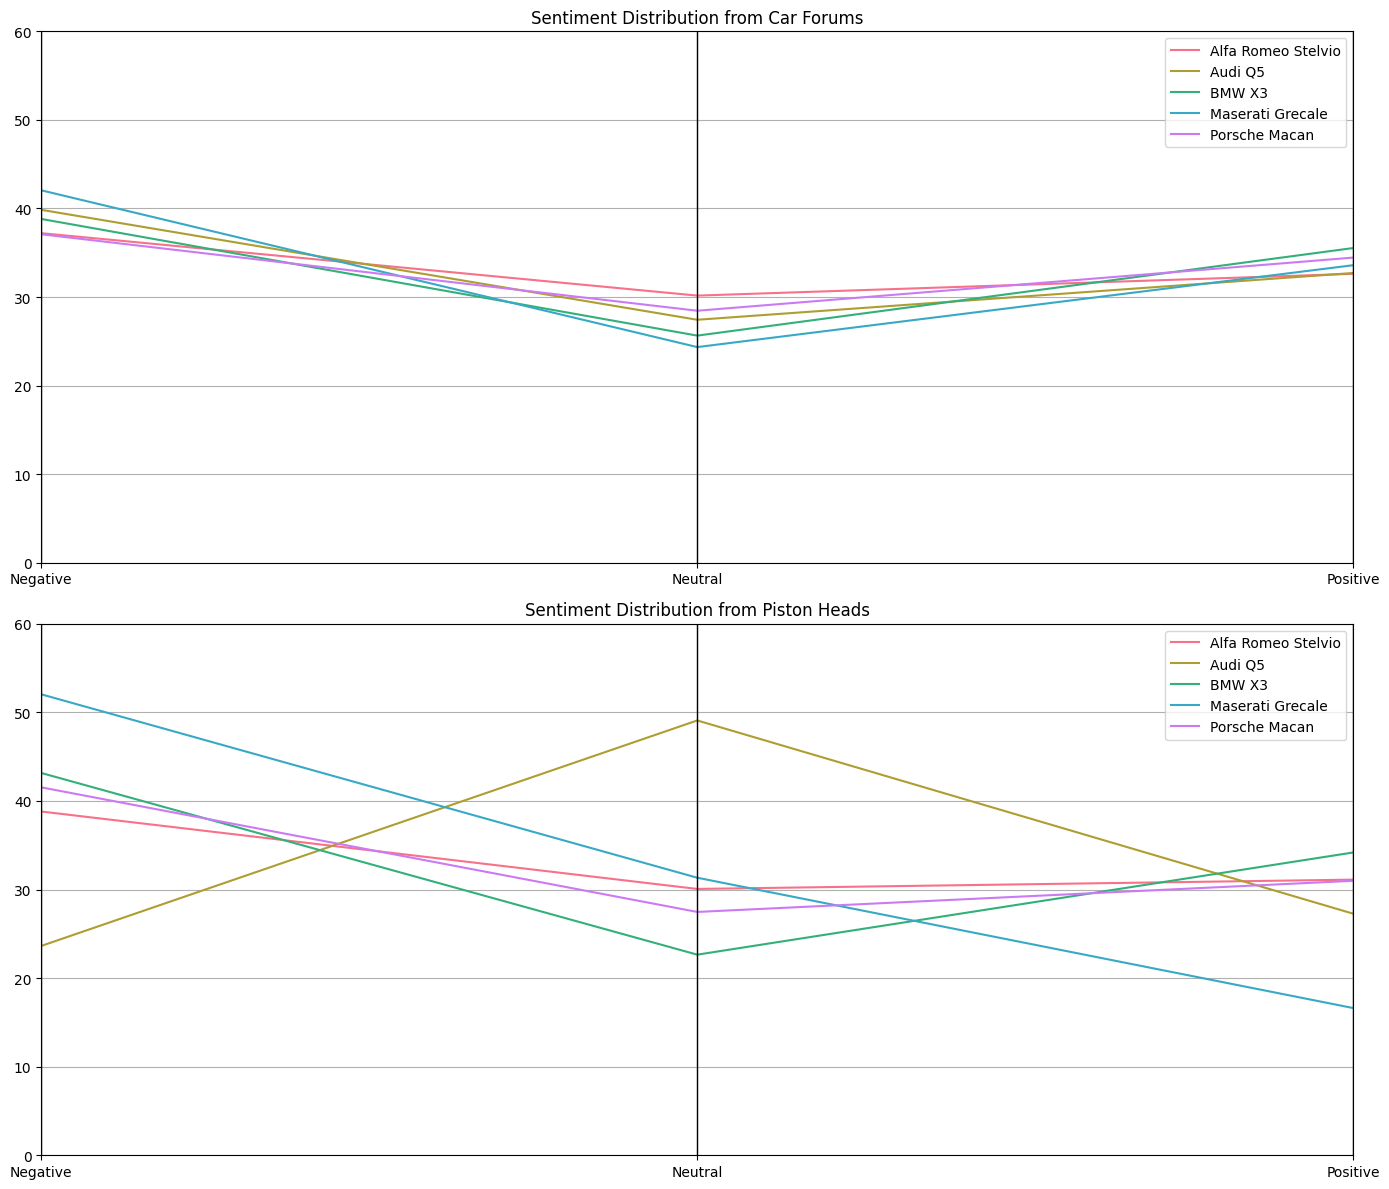

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns

# Data preparation
models = ["Alfa Romeo Stelvio", "Audi Q5", "BMW X3", "Maserati Grecale", "Porsche Macan"]
sentiments = ["Negative", "Neutral", "Positive"]

data_forums = {
    "Negative": [37.211777, 39.847970, 38.818250, 42.051860, 37.088889],
    "Neutral": [30.164361, 27.435487, 25.646140, 24.351747, 28.455556],
    "Positive": [32.623862, 32.716543, 35.535610, 33.596392, 34.455556]
}

data_piston_heads = {
    "Negative": [38.811189, 23.636364, 43.162393, 52.043597, 41.538462],
    "Neutral": [30.069930, 49.090909, 22.649573, 31.335150, 27.472527],
    "Positive": [31.118881, 27.272727, 34.188034, 16.621253, 30.989011]
}

data_combined = []

for model in models:
    for sentiment in sentiments:
        data_combined.append({
            "Model": model,
            "Sentiment": sentiment,
            "Car Forums": data_forums[sentiment][models.index(model)],
            "Piston Heads": data_piston_heads[sentiment][models.index(model)]
        })

df = pd.DataFrame(data_combined)

# Preparing data for parallel coordinates plot
parallel_data_forums = df.pivot(index='Model', columns='Sentiment', values='Car Forums').reset_index()
parallel_data_piston = df.pivot(index='Model', columns='Sentiment', values='Piston Heads').reset_index()

# Plot
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Plot parallel coordinates for Car Forums
parallel_coordinates(parallel_data_forums, 'Model', color=sns.color_palette("husl", 5), ax=ax[0])
ax[0].set_title('Sentiment Distribution from Car Forums')
ax[0].legend(loc='upper right')
ax[0].set_ylim(0, 60)

# Plot parallel coordinates for Piston Heads
parallel_coordinates(parallel_data_piston, 'Model', color=sns.color_palette("husl", 5), ax=ax[1])
ax[1].set_title('Sentiment Distribution from Piston Heads')
ax[1].legend(loc='upper right')
ax[1].set_ylim(0, 60)

plt.tight_layout()
plt.show()
